In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('house_price.csv')

# Inspect the data
df.head()

# Summary of dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [3]:
# Check categorical columns and their value counts
df.select_dtypes(include='object').nunique()


location    241
size         31
dtype: int64

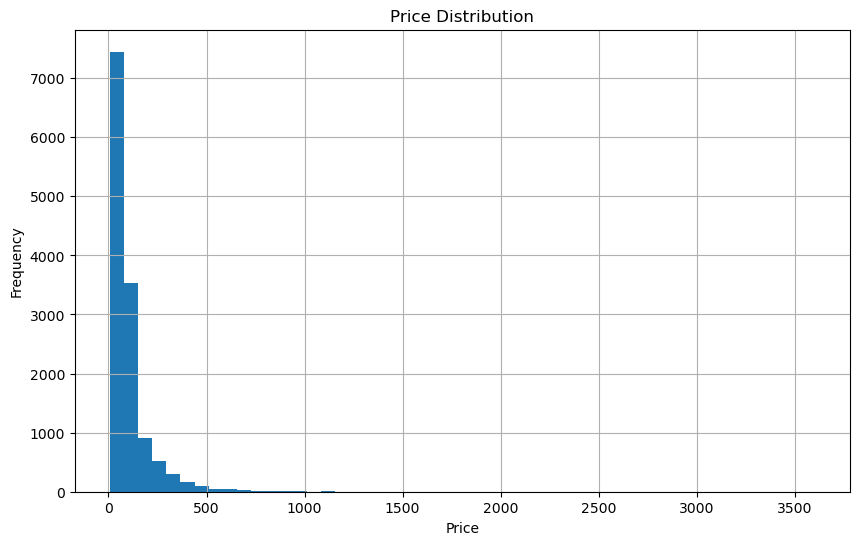

In [5]:
import matplotlib.pyplot as plt

# Plot histograms
df['price'].hist(bins=50, figsize=(10,6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Q2: Detect the outliers using the following methods and remove them
For detecting and handling outliers, we will use multiple methods and either trim, cap, or impute as appropriate.

a) Mean and Standard Deviation Method:
Outliers are typically defined as values that are more than 3 standard deviations away from the mean.

In [7]:
import numpy as np

# Calculate mean and standard deviation
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define outliers
outliers = df[(df['price'] < mean_price - 3*std_price) | (df['price'] > mean_price + 3*std_price)]

# Remove outliers
df_trimmed_std = df[(df['price'] >= mean_price - 3*std_price) & (df['price'] <= mean_price + 3*std_price)]


b) Percentile Method:
Outliers are values below the 5th percentile or above the 95th percentile.

In [9]:
# Calculate the 5th and 95th percentiles
lower_percentile = np.percentile(df['price'], 5)
upper_percentile = np.percentile(df['price'], 95)

# Filter out outliers
df_trimmed_percentile = df[(df['price'] >= lower_percentile) & (df['price'] <= upper_percentile)]


c) IQR (Interquartile Range) Method:
Outliers are values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [11]:
# Calculate Q1, Q3 and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_trimmed_IQR = df[(df['price'] >= (Q1 - 1.5*IQR)) & (df['price'] <= (Q3 + 1.5*IQR))]


d) Z-Score Method:
Outliers are values with a Z-score greater than 3 or less than -3.


In [14]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['price']))

# Filter out outliers
df_trimmed_zscore = df[z_scores < 3]


Q3: Create a box plot to determine which method works best for removing outliers

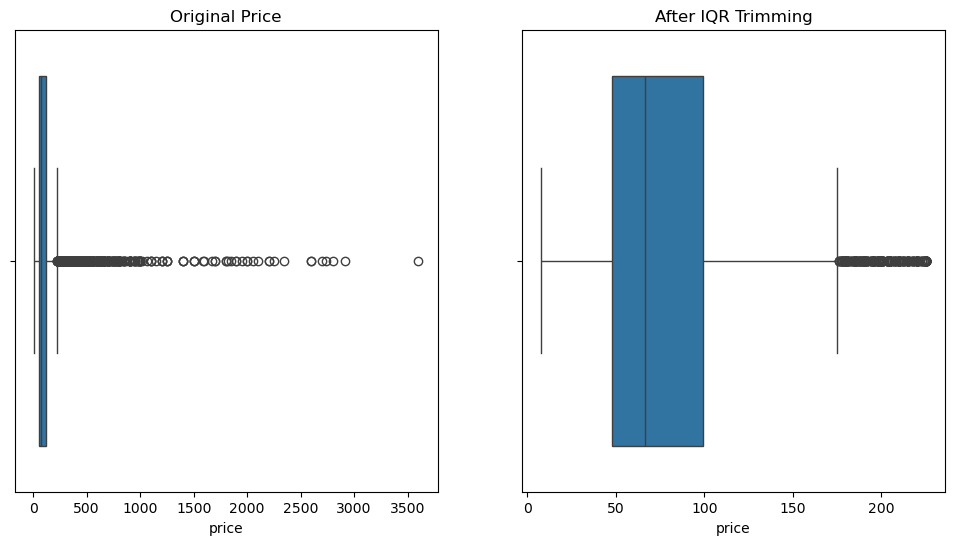

In [16]:
import seaborn as sns

# Plot boxplots for original and trimmed data
plt.figure(figsize=(12,6))

# Original Data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Original Price')

# After Trimming (for example using IQR method)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_trimmed_IQR['price'])
plt.title('After IQR Trimming')

plt.show()


Q4: Draw histplot to check the normality of the 'price per sqft' column and perform transformations

Plot the histogram:

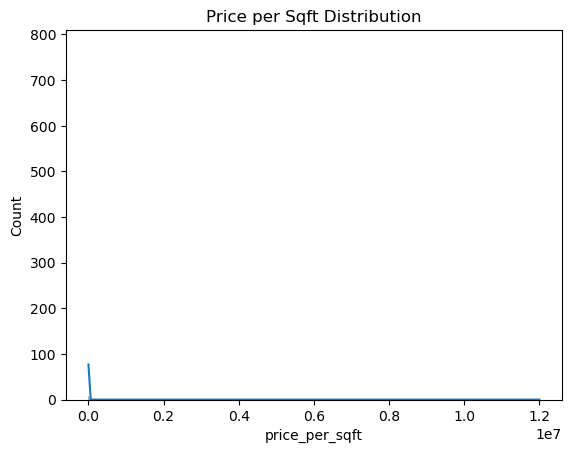

In [18]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Sqft Distribution')
plt.show()


Check Skewness and Kurtosis:

In [19]:
from scipy.stats import skew, kurtosis

# Check skewness and kurtosis before transformation
skewness = skew(df['price_per_sqft'])
kurt = kurtosis(df['price_per_sqft'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


Transform the data if needed (e.g., log transformation for skewed data):

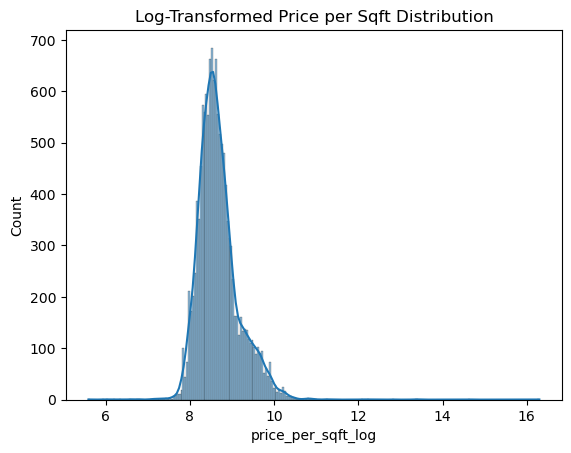

Skewness after transformation: 1.4003259019533636
Kurtosis after transformation: 9.203000543610957


In [20]:
# Apply log transformation if skewed
df['price_per_sqft_log'] = np.log(df['price_per_sqft'] + 1)  # Add 1 to avoid log(0)

# Plot transformed data
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Log-Transformed Price per Sqft Distribution')
plt.show()

# Check skewness and kurtosis after transformation
skewness_after = skew(df['price_per_sqft_log'])
kurt_after = kurtosis(df['price_per_sqft_log'])

print(f"Skewness after transformation: {skewness_after}")
print(f"Kurtosis after transformation: {kurt_after}")


Q5: Check the correlation between all numerical columns and plot a heatmap

In [ ]:
# Calculate correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
# Check the data types of all columns
df.dtypes

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

# You can also check for non-numeric columns like this
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft',
       'price_per_sqft_log'],
      dtype='object')
Index(['location', 'size'], dtype='object')


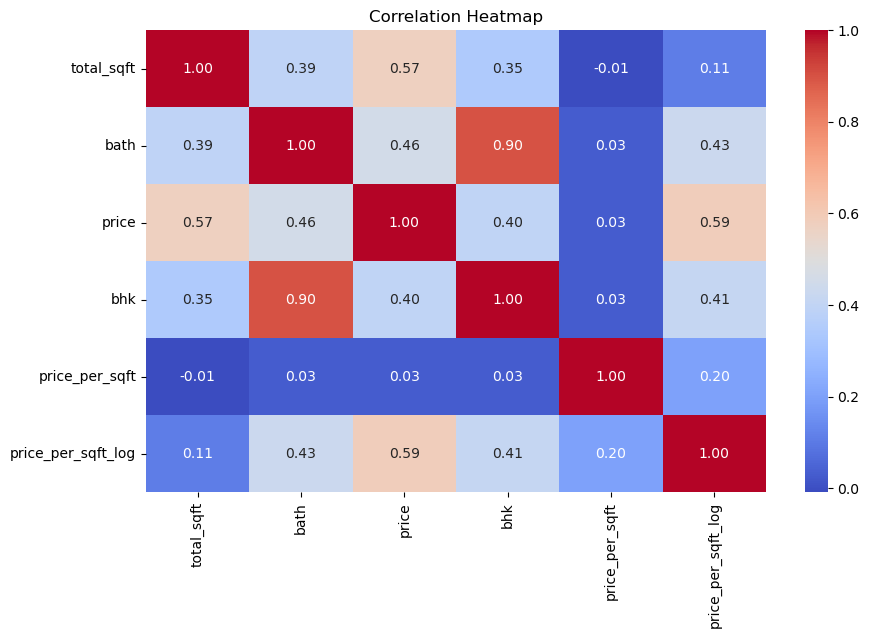

In [28]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Q6: Draw scatter plot between variables to check correlation 

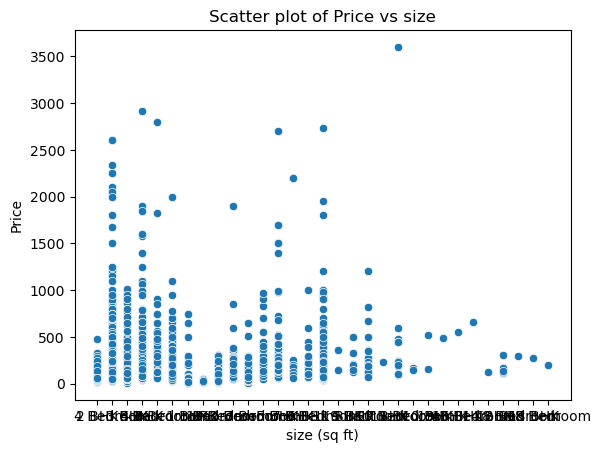

In [34]:
# Scatter plot between price and area (assuming 'area' is a column in the dataset)
sns.scatterplot(x=df['size'], y=df['price'])
plt.title('Scatter plot of Price vs size')
plt.xlabel('size (sq ft)')
plt.ylabel('Price')
plt.show()


In [32]:
# Check all the column names in the DataFrame
df.columns


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft', 'price_per_sqft_log'],
      dtype='object')